# Rep. 2. Checkpoint 2. Mov. Geométrico Browniano

## Actividad — Simulación Monte Carlo con portafolio real

Esta actividad es necesaria para la entrega del Reporte Integrador 2.

 
### **1. Construcción del portafolio con datos reales: Seleccionar entre 3 y 5 activos financieros disponibles en Yahoo Finance (distintos a los usados en clase).**

El código debe:

- Descargar precios históricos (al menos 2 años)

- Calcular retornos diarios

- Calcular la media de retornos

- Calcular la matriz de covarianza

- Definir un portafolio con pesos que sumen 1

- Graficar los precios históricos de los activos seleccionados

- El estudiante puede elegir libremente los activos.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import datetime as dt

In [2]:
stocks = ["TSLA","PLTR","QQQ","VOO"]
weights = np.array([0.25,0.25,0.25,0.25])

if not np.isclose(weights.sum(),1):
    raise ValueError("Los pesos deben sumar 1")

end = dt.datetime.now()
start = end - dt.timedelta(days=365*3)

In [3]:
prices = yf.download(stocks,start=start,end=end,progress=False)["Close"]
returns = prices.pct_change().dropna()

mean_returns = returns.mean()
cov_matrix = returns.cov()

print("Media diaria retornos:")
print(mean_returns)
print("\\nMatriz de covarianza:")
print(cov_matrix)

Media diaria retornos:
Ticker
PLTR    0.004508
QQQ     0.001055
TSLA    0.001651
VOO     0.000816
dtype: float64
\nMatriz de covarianza:
Ticker      PLTR       QQQ      TSLA       VOO
Ticker                                        
PLTR    0.001708  0.000279  0.000632  0.000201
QQQ     0.000279  0.000152  0.000281  0.000109
TSLA    0.000632  0.000281  0.001362  0.000200
VOO     0.000201  0.000109  0.000200  0.000086


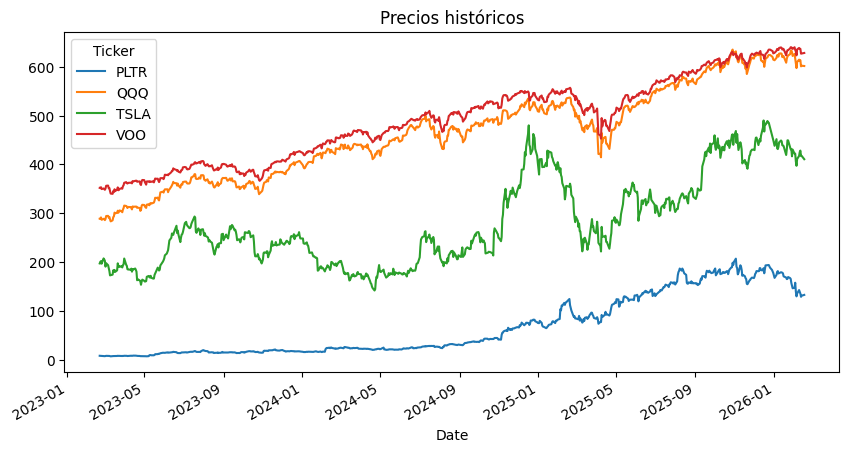

In [4]:
prices.plot(figsize=(10,5),title="Precios históricos")
plt.show()

### **2. Exploración de datos del portafolio, a partir de los datos históricos:**

- Graficar la matriz de correlación entre activos

- Graficar la distribución de retornos del portafolio

- Calcular el retorno promedio del portafolio

- Calcular la volatilidad histórica del portafolio



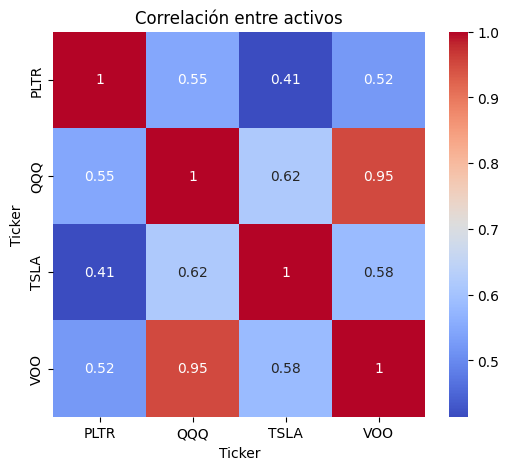

In [5]:
plt.figure(figsize=(6,5))
sns.heatmap(returns.corr(),annot=True,cmap="coolwarm")
plt.title("Correlación entre activos")
plt.show()

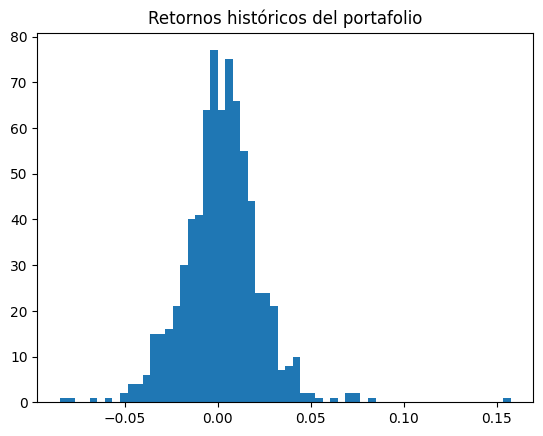

Volatilidad histórica diaria: 0.020477837199544262
Retornos históricos del portafolio: 0.002007548557157906


In [11]:
portfolio_hist = returns.dot(weights)

plt.hist(portfolio_hist,bins=60)
plt.title("Retornos históricos del portafolio")
plt.show()

print("Volatilidad histórica diaria:", portfolio_hist.std())
print("Retornos históricos del portafolio:", portfolio_hist.mean())

**Responder brevemente en comentarios dentro del código:**

**¿Qué activos están más correlacionados?**

- Todos mis activos tienen una correlación positiva, pero los activos más correlacionados entre sí son: QQQ y VOO (0.91).

**¿El portafolio parece estable o muy variable?**

- Muy estable.

**¿Cuál activo parece dominar el comportamiento del portafolio?**

- Mi portafolio parece estar dominado por QQQ.

### **3. Simulación Monte Carlo del portafolio, implementar una simulación Monte Carlo para el portafolio.**

**El código debe:**

- Usar media y matriz de covarianza históricas

- Simular al menos 5,000 trayectorias

- Simular al menos 252 días hacia adelante

- Generar choques normales correlacionados

- Generar las siguientes gráficas:

- Trayectorias simuladas del portafolio

- Distribución del valor final del portafolio

In [12]:
num_sim = 5000
num_days = 252
k = len(stocks)

L = np.linalg.cholesky(cov_matrix)
portfolio_paths = np.zeros((num_days,num_sim))

In [13]:
for m in range(num_sim):

    Z = np.random.normal(size=(num_days,k))
    correlated = Z @ L.T
    daily_returns = correlated + mean_returns.values
    port_daily = daily_returns @ weights
    portfolio_paths[:,m] = np.cumprod(1+port_daily)

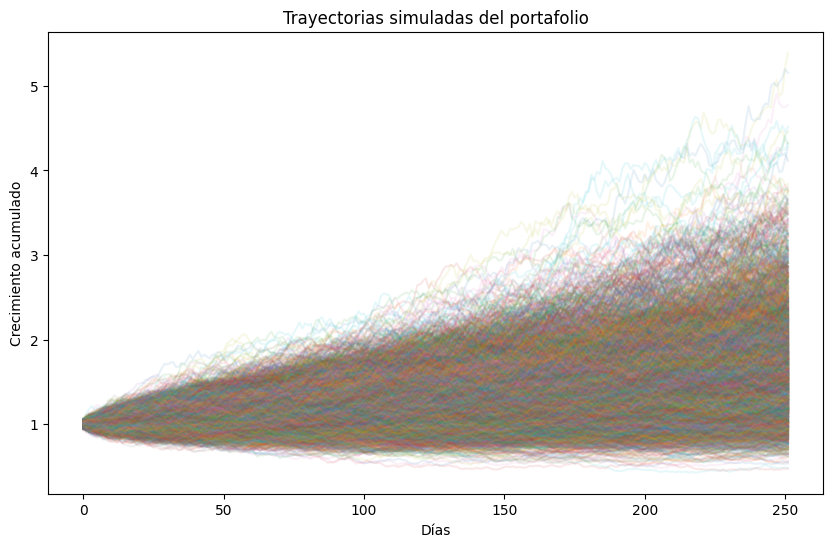

In [14]:
plt.figure(figsize=(10,6))
plt.plot(portfolio_paths,alpha=0.1)
plt.title("Trayectorias simuladas del portafolio")
plt.xlabel("Días")
plt.ylabel("Crecimiento acumulado")
plt.show()

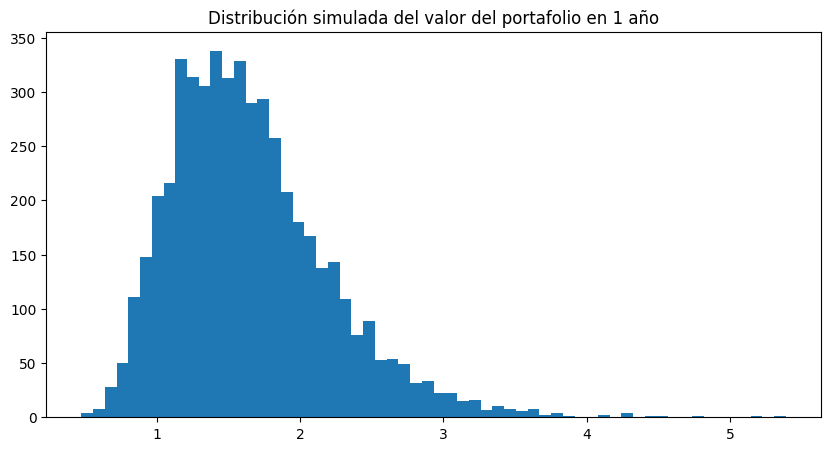

Valor esperado final: 1.6526639547511022
Probabilidad de pérdida: 0.0852
Valor máximo observado: 5.390751527345182
Valor mínimo observado: 0.47382471653959124


In [16]:
final_values = portfolio_paths[-1]

plt.figure(figsize=(10,5))
plt.hist(final_values,bins=60)
plt.title("Distribución simulada del valor del portafolio en 1 año")
plt.show()

print("Valor esperado final:", final_values.mean())
print("Probabilidad de pérdida:", np.mean(final_values<1))
print("Valor máximo observado:", final_values.max())
print("Valor mínimo observado:", final_values.min())

### **4. Análisis de la simulación, calcular e imprimir:**

**Valor promedio final del portafolio**

- 1.6526639547511022

**Valor máximo observado**

- 5.390751527345182


**Valor mínimo observado**

- 0.47382471653959124

**Responder en comentarios en Markdown:**

**¿Las trayectorias simuladas son similares entre sí o muy distintas?**

-  La mayoría de trayectorias son similares entre sí, exceptuando algunas muy altas o muy bajas.

**¿La dispersión aumenta con el tiempo?**

-  Sí, definitivamente mientras más tiempo pase, más se abren los caminos.

**¿Qué observas en la distribución final del portafolio?**

- Se asemeja a una distribución normal, pero es leptocúrtica, con probababilidad mayor de que ocurran eventos extremos positivos.

### **5. Exploración libre**
**Modificar al menos uno de los siguientes elementos para generar un nuevo portafolio:**

- Cambiar los activos del portafolio

- Cambiar los pesos

- Cambiar el horizonte temporal 

- Compara tus resultados con el portafolio anterior y agregar reflexiona:

El objetivo es experimentar con el modelo y observar cómo cambian las simulaciones.

In [19]:
stocks2 = ["TSLA","PLTR","QQQ","VOO"]
weights2 = np.array([0.30,0.20,0.35,0.15])

if not np.isclose(weights2.sum(),1):
    raise ValueError("Los pesos deben sumar 1")

end2 = dt.datetime.now()
start2 = end2 - dt.timedelta(days=365*3)

In [20]:
prices2 = yf.download(stocks2,start=start2,end=end2,progress=False)["Close"]
returns2 = prices2.pct_change().dropna()

mean_returns2 = returns2.mean()
cov_matrix2 = returns2.cov()

print("Media diaria retornos:")
print(mean_returns2)
print("\\nMatriz de covarianza:")
print(cov_matrix2)

Media diaria retornos:
Ticker
PLTR    0.004508
QQQ     0.001055
TSLA    0.001651
VOO     0.000816
dtype: float64
\nMatriz de covarianza:
Ticker      PLTR       QQQ      TSLA       VOO
Ticker                                        
PLTR    0.001708  0.000279  0.000632  0.000201
QQQ     0.000279  0.000152  0.000281  0.000109
TSLA    0.000632  0.000281  0.001362  0.000200
VOO     0.000201  0.000109  0.000200  0.000086


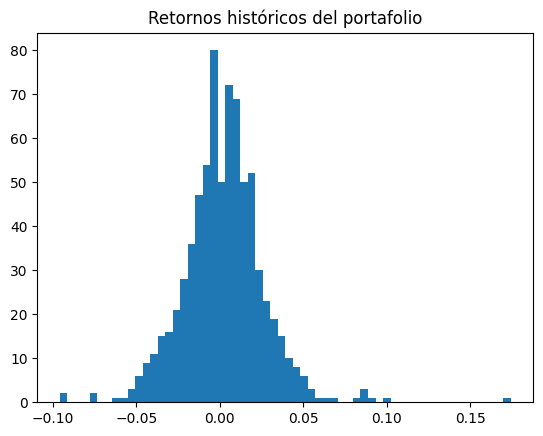

Volatilidad histórica diaria: 0.024074194002124346
Retornos históricos del portafolio: 0.0022636722548658936


In [31]:
portfolio_hist2 = returns2.dot(weights2)

plt.hist(portfolio_hist2,bins=60)
plt.title("Retornos históricos del portafolio")
plt.show()

print("Volatilidad histórica diaria:", portfolio_hist2.std())
print("Retornos históricos del portafolio:", portfolio_hist2.mean())

In [32]:
num_sim2 = 5000
num_days2 = 252
k2 = len(stocks2)

L2 = np.linalg.cholesky(cov_matrix2)
portfolio_paths2 = np.zeros((num_days2,num_sim2))

In [35]:
for m2 in range(num_sim2):

    Z2 = np.random.normal(size=(num_days2,k2))
    correlated2 = Z2 @ L2.T
    daily_returns2 = correlated2 + mean_returns2.values
    port_daily2 = daily_returns2 @ weights2
    portfolio_paths2[:,m2] = np.cumprod(1+port_daily2)

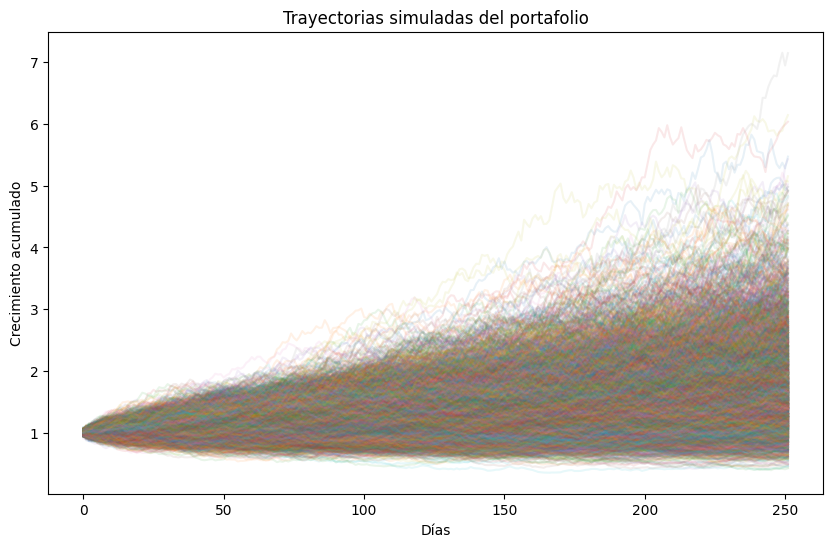

In [36]:
plt.figure(figsize=(10,6))
plt.plot(portfolio_paths2,alpha=0.1)
plt.title("Trayectorias simuladas del portafolio")
plt.xlabel("Días")
plt.ylabel("Crecimiento acumulado")
plt.show()

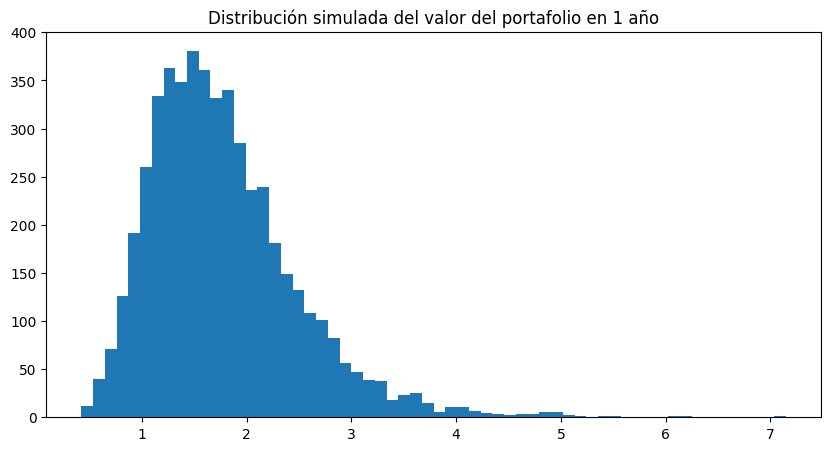

Valor esperado final: 1.7721495357929111
Probabilidad de pérdida: 0.0954
Valor máximo observado: 7.147709780009952
Valor mínimo observado: 0.4219734507843653


In [37]:
final_values2 = portfolio_paths2[-1]

plt.figure(figsize=(10,5))
plt.hist(final_values2,bins=60)
plt.title("Distribución simulada del valor del portafolio en 1 año")
plt.show()

print("Valor esperado final:", final_values2.mean())
print("Probabilidad de pérdida:", np.mean(final_values2<1))
print("Valor máximo observado:", final_values2.max())
print("Valor mínimo observado:", final_values2.min())


**¿Qué observas al modificar el portafolio o el horizonte?**

- El valor esperado disminuyó, la probabilidad de pérdida aumentó, el valor máximo aumentó y el mínimo disminuyó.